In [4]:
!nvidia-smi
#to checkgpu

Thu Dec  5 19:46:59 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 475.14       Driver Version: 475.14       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 N/A |                  N/A |
| 30%    0C    P8    N/A /  N/A |    493MiB /  4096MiB |     N/A      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
#import tensorflow
import tensorflow as tf
tf.__version__  #tensorflow version

'2.17.0'

In [6]:
#creating tensor  tf.constant()

scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [7]:
#ndim no of dimension
scalar.ndim

0

In [8]:
# vector 
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [9]:
vector.ndim

1

In [10]:
matrix = tf.constant([[10,7],
                     [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]])>

In [11]:
matrix.ndim

2

In [12]:
another_matrix= tf.constant([[10.,7.],[3.,2.],[8.,9.]] ,dtype=tf.float16)
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

**dot (.) after an integer is called 32 bit precison means<br>
after decimal single value is stored like 6.0 ,7.0**

In [13]:
another_matrix.ndim

2

In [14]:
another_matrix.shape

TensorShape([3, 2])

In [15]:
## create a tensor

In [16]:
tensor = tf.constant([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]],[[13,14,15],[16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])>

In [17]:
tensor.ndim

3

**so what i learn so far<br>**
**scalar - 0 dimension single number<br>
vector - a list of no. (no with direction example speed wind etc)<br>
matrix - 2 dimensional no of arrays<br>
tensor - n dimensional array where n can be any no.<br>**


In [18]:
# create tensor with tf.Variable

# capital v in tf.Variable

changeable_tensor=tf.Variable([10,7])
changeable_tensor
unchangeable_tensor=tf.constant([10,7])
unchangeable_tensor

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7])>

#now try to change or i say try to assign value


changeable_tensor[0]=7



gives error


In [19]:
# ok = not supported what should we do

In [20]:
# we have to use .assign() 

changeable_tensor=changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'UnreadVariable' shape=(2,) dtype=int32, numpy=array([7, 7])>

In [21]:
# we cant change in constant variable

# it is done becz we dont want  in tensors that our values will change

In [22]:
# if you ever in doubt what u should use generally use tf.constant and after that u can change into tf.Variable wheneveru want

#### **creating random tensors**

In [23]:
# fill tensor with random numbers
# tf.random.Generator ---->to generate random no
# G in generator is capital
# .from_seed(seednumber)  ----> to produce reproducibility so hat when someone need the exac same no that  i hav created randomly they should also get the same numbers

random1 = tf.random.Generator.from_seed(7)

print(random1) # object is generated
#using normal distribution and giving shape as a parameter to form a matrix
# tf.random.uniform(shape=(rows,columns))
#u can also use uniform in place of normalisation
random1=tf.random.normal(shape=(3,3))
random1

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.75503093,  2.2664874 ,  0.98057866],
       [ 0.46749747,  0.05569854, -0.39892036],
       [-0.8316743 ,  0.9918361 ,  1.5518987 ]], dtype=float32)>

In [24]:
#now create random2
random2 = tf.random.Generator.from_seed(7)
print(random2)
random2 = tf.random.uniform(shape=(3,3))
random2

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.58652174, 0.8827754 , 0.26302755],
       [0.17972124, 0.05609488, 0.7428069 ],
       [0.43715   , 0.8199091 , 0.60659087]], dtype=float32)>

In [25]:
# is random1 thatuses normal distribution and random2 that uses uniform distribution are they same?
# lets check it out


random1==random2

<tf.Tensor: shape=(3, 3), dtype=bool, numpy=
array([[False, False, False],
       [False, False, False],
       [False, False, False]])>

In [26]:
# can we shuffle our tensors lets See

#tf.random.shuffle is used to shuffle

random1= tf.constant([[1,2],[3,4],[5,6]])
print(random1)

# now doing the shuffling

print("\n\nafter shuffling")

random1=tf.random.shuffle(random1)
print(random1)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


after shuffling
tf.Tensor(
[[5 6]
 [1 2]
 [3 4]], shape=(3, 2), dtype=int32)


In [27]:
# to do random shuffling in an order so every time it shufffle in this order we Use

# tf.random.set_sed(seednumber)

# and afterthatintf.random.shuffle()
# we passs a parameter in this function seed=seednumber


print("\n\nafter shuffling")
tf.random.set_seed(42)
random1=tf.random.shuffle(random1, seed=42)
print(random1)



after shuffling
tf.Tensor(
[[5 6]
 [1 2]
 [3 4]], shape=(3, 2), dtype=int32)


**seed are of 2 types<br>
1.global level seeds <br>
2.operational level seeds<br><br>
the tf.random.set_seed(seednumber)---->this is our global seed<br>
and the parameter seed=seednumber is our operational level seed<br>**

In [28]:
#doc string appears  in colab shift+ctrl+space
# you can remeber this as it formed aplhabet letter L in keyboard

**1.If neither the global seed nor the operation seed is set: A randomly picked seed is used for this op.<br><br>
2.If the global seed is set, but the operation seed is not: The system deterministically picks an operation seed in conjunction with the global seed so that it gets a unique random sequence. Within the same version of tensorflow and user code, this sequence is deterministic. However across different versions, this sequence might change. If the code depends on particular seeds to work, specify both global and operation-level seeds explicitly.<br><br>
3.If the operation seed is set, but the global seed is not set: A default global seed and the specified operation seed are used to determine the random sequence.<br><br>
4.If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence.<br>**

****other ways to make tensors you should know****

In [29]:
tf.ones(shape=(3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [30]:
tf.ones([3,2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [31]:
tf.zeros(shape=(3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [32]:
tf.zeros(shape=[3,3])

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

#### **converting numpy arrays into tensors**

In [33]:
# converting numpy arrays into tensors

# difference b/w numpy arrays and tensors is simple
# tensors can run on gpu whereas numpy cannot

# creating a numpy array
import numpy as np # importing numpy 
numpy_array=np.arange(1,25,dtype=np.int32)
numpy_array

# np.arange is used to give a range
# pass range in parameters
# np.arange(starting, ending_is_exclusive, dtype=np.float16/np.int32)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [34]:
#converting into tensor 

tensor= tf.constant(numpy_array)
tensor

# we can change its shape to form a tensor of any dimension
tensor=tf.constant(numpy_array,shape=(6,4))
tensor

<tf.Tensor: shape=(6, 4), dtype=int32, numpy=
array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16],
       [17, 18, 19, 20],
       [21, 22, 23, 24]])>

In [35]:
# information from tensor

#   terms                                meaning                 code
#   in language

#   shape                      length of no of elements        tensor.shape



#   ndim or also called rank      scalar has 0 ndim            tensor.ndim
#                                 vector has 1 ndim
#                                 matrix has 2 ndim



#   size                            total no of item           tf.size(tensor)




#   access an                       tensor row accessing        tensor[0]
#   axis 




In [36]:
# and a one more to find datatype of tensor

# tensor.dtype

In [37]:
# creating a tensor
# four_dim_tensor or can say rank 4 tensor 


four_dim_tensor=tf.ones(shape=(2,3,4,5),dtype=tf.int32)
# here 2- means 2 group
# 3-means each group has 3 members
# 4-means each member has 4 rows
# 5-means each member has 5 column
four_dim_tensor


<tf.Tensor: shape=(2, 3, 4, 5), dtype=int32, numpy=
array([[[[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]]],


       [[[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]],

        [[1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1],
         [1, 1, 1, 1, 1]]]])>

In [38]:
# what is the shape?
four_dim_tensor.shape

TensorShape([2, 3, 4, 5])

In [39]:
# what is  ndim of four_dim_tensor?

four_dim_tensor.ndim

4

In [40]:
# how much  is tensor all elements?
tf.size(four_dim_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=120>

In [41]:
### this tf.size output is not satisfying lets make it better
# so that we can view it better

#by using dot (.)numpy()

tf.size(four_dim_tensor).numpy()

120

In [42]:
# viewing the shape


# first defining.shape[index]

four_dim_tensor.shape[0]

# 0 index par kon si shape h



2

In [43]:
# viewing the shape


# first defining.shape[index]

four_dim_tensor.shape[-1]

# last index par kon si shape h


5

In [44]:
# what is the datatype of this four_dim_tensor?
four_dim_tensor.dtype

tf.int32

In [45]:
# supppose we have some list how canweaccess its elements

some_list = [1,2,3,4,5]

# access first element
some_list[0]

1

In [46]:
# supposewe have a matrix of shape 2,3,2

matrix=tf.constant([[[1,2],[3,4],[5,6]],[[7,8],[9,10],[11,12]]])
print (matrix)

tf.Tensor(
[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]], shape=(2, 3, 2), dtype=int32)


In [47]:
##aceesing first row of each 

matrix[:,:,1]

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 2,  4,  6],
       [ 8, 10, 12]])>

In [48]:
# accessing first element of each
matrix[0:2,0:1,0:1]

<tf.Tensor: shape=(2, 1, 1), dtype=int32, numpy=
array([[[1]],

       [[7]]])>

In [49]:
another_matrix=tf.ones(shape=(2,2))
another_matrix

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [50]:
#expanding the dimension 
# supppose we want to expand dimension lets suppose at last 
another_matrix_dim3=another_matrix[:,:, tf.newaxis]
another_matrix_dim3

<tf.Tensor: shape=(2, 2, 1), dtype=float32, numpy=
array([[[1.],
        [1.]],

       [[1.],
        [1.]]], dtype=float32)>

In [51]:
#expanding the dimension 
# supppose we want to expand dimension lets suppose at last 
another_matrix_dim3=another_matrix[..., tf.newaxis]
another_matrix_dim3

<tf.Tensor: shape=(2, 2, 1), dtype=float32, numpy=
array([[[1.],
        [1.]],

       [[1.],
        [1.]]], dtype=float32)>

In [52]:
another_matrix_dim3=tf.expand_dims(another_matrix,axis=-1)
another_matrix_dim3
#axis=?   value 0 means index 0 ,value1 means index 1 value -1 means index last

<tf.Tensor: shape=(2, 2, 1), dtype=float32, numpy=
array([[[1.],
        [1.]],

       [[1.],
        [1.]]], dtype=float32)>

#### **tensor basic operations like + - * /**

In [53]:
#suppose we have a tensor 
tensor1= tf.constant([[10,15],
                      [20,25]])
tensor1

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 15],
       [20, 25]])>

In [54]:
tensor1+10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 25],
       [30, 35]])>

In [55]:
tensor1-10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0,  5],
       [10, 15]])>

In [56]:
tensor1*10  # multiply to each individual element

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100, 150],
       [200, 250]])>

In [57]:
tensor1/10

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1. , 1.5],
       [2. , 2.5]])>

In [58]:
#you can use built in function 
#which generally are built for process faster by gpu


# tf.math.add(tensor_name,value_you_want_to_add)

# aise hi tf.math.multiply(tensor_name,value_you_want_to_add) hai multiply to each individual element

In [59]:
tensor1

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10, 15],
       [20, 25]])>

In [60]:
#lets give it a try with multiply to each individual element using built in

tf.math.multiply(tensor1,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100, 150],
       [200, 250]])>

In [61]:
# we can use like this without .math 
tf.multiply(tensor1,10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100, 150],
       [200, 250]])>

#### **matrix multiply real**

In [62]:
tf.matmul(tensor1,tensor1) #here matrix multiply real matrix occurs here

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[400, 525],
       [700, 925]])>

In [63]:
# we can use python operator @ for actual matrix multiplication
tensor1 @ tensor1

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[400, 525],
       [700, 925]])>

#### **visualize through this website http://matrixmultiplication.xyz**

In [64]:
import tensorflow as tf
tensor1= tf.constant([[1,2,3],
                     [4,5,6],
                     [7,8,9]])
tensor1

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])>

In [65]:
tensor2= tf.constant([[1,2],
                     [4,5],
                     [7,8]])
tensor2

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [4, 5],
       [7, 8]])>

In [66]:
tf.matmul(tensor1,tensor2)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 30,  36],
       [ 66,  81],
       [102, 126]])>

**2 rules of matrix multiplication real wali<br><br>
1.inner dimension must match<br>
2.outer dimension is the result**

In [67]:
#suppose we have a matrix 
tensor1= tf.constant([[1,2,3],
                     [4,5,6],
                     ])
tensor1

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [68]:
# reshaping this matrix 
tf.reshape(tensor1,shape=(3,2))

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]])>

In [69]:
#what istranspose
x=tf.constant([
    [1,2,3],
    [4,5,6],
    [7,8,9],
            ])

x.shape

TensorShape([3, 3])

**transpose -------flip axes**

In [70]:
tf.transpose(x)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])>

In [71]:
print(x)

y=tf.constant([
            [1,2,3],
            [4,5,6],
            
            ])
print(y)
y.shape

tf.Tensor(
[[1 2 3]
 [4 5 6]
 [7 8 9]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


TensorShape([2, 3])

**multiply using another method tf.tensordot()**

In [72]:
tf.tensordot(x,tf.transpose(y),axes=1)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 14,  32],
       [ 32,  77],
       [ 50, 122]])>

**default datatype of matrix is int32 sometimes we need to change it according to our problem how to do it**

In [73]:
x=tf.constant([
    [1,2,3],
    [4,5,6],
])
print(x)
print(x.dtype)
y=tf.constant([
    [1.,2.,3.],
    [4.,5.,6.],
    
])

print(y)
print(y.dtype)


tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
<dtype: 'int32'>
tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
<dtype: 'float32'>


In [74]:
## changing tensor data types

tf.cast(x,dtype=tf.float16)

<tf.Tensor: shape=(2, 3), dtype=float16, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float16)>

#### **aggregating tensors**


In [75]:
#aggregating tensors---- 

# combines the tensor
# from multiple values 
# down to smaller amount of values

In [76]:
# getting values
# min
# max
# mean
# sum

In [77]:
c=tf.constant([
            np.random.randint(0,100,size=50)
])
print(c)

tf.size(c),c.shape,c.ndim

tf.Tensor(
[[69 40 92 95  7 67 43 31 73 52 47  0 81 45  1 23  0 41 55 25 97 35  6 12
  44 55 26 71  1 26 82 97 65 13 30 16 20 49 33 95 79 73 36 34 58 79 87  2
  13 14]], shape=(1, 50), dtype=int32)


(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([1, 50]), 2)

In [78]:
# find minimum
tf.reduce_min(c)


<tf.Tensor: shape=(), dtype=int32, numpy=0>

**same as np.min() working gives  the number that you want minmax sum avg**
<br><br>
**numpy=0>**

In [79]:
tf.reduce_max(c)

<tf.Tensor: shape=(), dtype=int32, numpy=97>

In [80]:
tf.reduce_mean(c)

<tf.Tensor: shape=(), dtype=int32, numpy=44>

In [81]:
tf.reduce_sum(c)

<tf.Tensor: shape=(), dtype=int32, numpy=2235>

#### **find variance and std?**

In [82]:
tf.math.reduce_variance(tf.cast(c,dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=886.29>

In [83]:
tf.math.reduce_std(tf.cast(c,dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=29.770622>

#### **pip install tensorflow-probability**

In [84]:
pip install tensorflow-probability


Note: you may need to restart the kernel to use updated packages.


In [85]:
# requires tf above than 2.18+
# import tensorflow_probability as tfp

# tfp.stats.variance(c)


#### **positional maximum and mininmum**

In [86]:
#when our model gives representation output it givess us in probibilty form 

# [0.89,0.10,0.01]

# like this from this representation we find maximum probaiblity

In [87]:
tf.random.set_seed(42)
m=tf.random.uniform([50])
m

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [88]:
tf.argmax(m)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [89]:
np.argmax(m)

42

**see answer is same**


**but we follow the tensorflow way**

In [90]:
#now on index 42 we want to see which value is exist

m[tf.argmax(m)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

**on 42 index in our random tensor is our maximum value exists**

**which is numpy=0.9671384**

In [91]:
#now wecan do same with likemin

tf.argmin(m)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [92]:
# value on index 16

m[tf.argmin(m)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

**see we can find minimum too**

#### **squeezing a tensor**

**squeezing means removing all 1 dimension axes**

In [93]:
tf.random.set_seed(42)
x=tf.random.uniform(
                 
                 shape=(1,1,1,1,50)
                )

In [94]:
tf.squeeze(x)

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

#### **one_hot encoding**

In [165]:
some_list=[0,1,2]
depth=3 #how type of matrix you want for depth =3 it will give you 3x3 matrix
tf.one_hot(some_list,depth)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)>

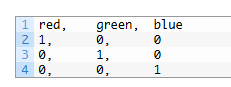

In [160]:
#1 is here is on_value if true then place 1
#0 is our off_value if false place 0

In [161]:
##on_value=1 default ##off_value =0 default
#u know what is true False

**here the list we pass into one_hot is called indices**

In [167]:
tf.one_hot(some_list,depth,on_value="present", off_value="absent")

<tf.Tensor: shape=(3, 3), dtype=string, numpy=
array([[b'present', b'absent', b'absent'],
       [b'absent', b'present', b'absent'],
       [b'absent', b'absent', b'present']], dtype=object)>

**tensor math operations**

In [116]:
x=tf.range(0,10)  ## creates a vector of range 0 to 10 with shape (1row 10 column)

x

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [100]:
tf.math.square(x)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])>

In [108]:
# tf.math.sqrt(x)#if we pass int32 t gives error it needs other than int32 dtype
tf.math.sqrt(tf.cast(x,dtype=tf.float32))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.       , 1.       , 1.4142135, 1.7320508, 2.       , 2.236068 ,
       2.4494898, 2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [109]:
# tf.math.log(x)#if we pass int32 t gives error it needs other than int32 dtype
tf.math.log(tf.cast(x,dtype=tf.float32))

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([     -inf, 0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 ,
       1.7917595, 1.9459102, 2.0794415, 2.1972246], dtype=float32)>

**tensoflow and numpy compatibility**

In [147]:
##lets create anumpy array

import numpy as np
j=np.array([1.,2.,3.,4.])
print(j)
print(type(j))

[1. 2. 3. 4.]
<class 'numpy.ndarray'>


In [148]:
## converting into a tensor
jtensor=tf.constant(j)
jtensor

<tf.Tensor: shape=(4,), dtype=float64, numpy=array([1., 2., 3., 4.])>

In [149]:
# converting tensor into numpy
j=np.array(jtensor)
j


array([1., 2., 3., 4.])

In [150]:
##shorthandy trick toconvert into numpy
jtensor.numpy()

array([1., 2., 3., 4.])

In [151]:
print(j.dtype)
print(jtensor.dtype)

float64
<dtype: 'float64'>


In [152]:
# did the data type of these i mean tensor and numpy is same if we did this

numpy_array_converting_to_tensor=tf.constant(np.array([1.,2.,3.]))

tensor=tf.constant([1.,2.,3.])

In [153]:
print(numpy_array_converting_to_tensor.dtype)

print(tensor.dtype)

<dtype: 'float64'>
<dtype: 'float32'>


**oooh see if we create a tensor using numpy it has dtype float 64<br><br>but if we create a tensor normally it has float32 dtype got it!!!!**

#### **list_physical_devices**

In [141]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

**i am using tensorflow cpu right now so it work like this if u turn on gpu t4 in colab u will get the graphic card also**

**cpu - process things fast**

**tpu - is an ai accelerator (asic) means application specific integrated circuit runs faster than cpu owned by google**

**gpu - gpu t4  graphic proceessing unit it is fastest in processing it break task into thousands or millions process and then process the task so efficiently all the process run parallelly here**

**another code to check**

In [154]:
!nvidia-smi

Thu Dec  5 20:33:33 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 475.14       Driver Version: 475.14       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 N/A |                  N/A |
| 30%    0C    P8    N/A /  N/A |    571MiB /  4096MiB |     N/A      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### **exercise**

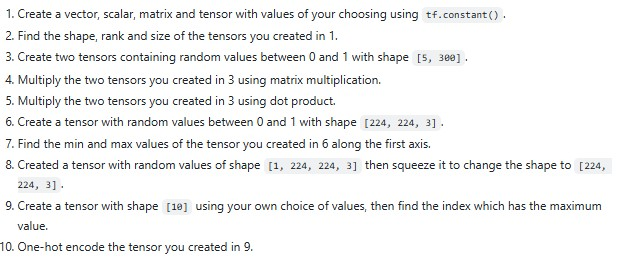